# Customer analysis in marketing campaigns

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the marketing team of a grocery store. They would like to find which are the ideal customers according to the results of the last marketing campaigns. Your analysis will be helpful to adapt and modify products according to the different needs and behavior of their customers.

You dispose of a dataset from the mall dataset with several features:


People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

'Z_CostContact' and 'Z_Revenue' contains constant value across all the observations and therefore they will not contribute anything in the analysis.

You have two days to do this study

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
campaign_df = pd.read_csv('https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/98441cd2-a8ae-4bd3-a35f-e415852dbbe5.csv', sep="\t")

#Dropna
campaign_df.dropna(axis=0,inplace=True)

#Drop colonnes inutiles
campaign_df.drop(['ID','Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

#Drop quelques lignes
campaign_df = campaign_df.drop([239,339,192,2233],axis=0)

#Drop duplicate
campaign_df[campaign_df.drop(["Response"], axis=1).duplicated()

#Remplacement de la colonne year of birth par Age
campaign_df["Age"] = 2014 - campaign_df["Year_Birth"]
campaign_df.drop("Year_Birth", axis=1, inplace=True)

#Transformation en date_time
campaign_df["Dt_Customer"] = pd.to_datetime(campaign_df["Dt_Customer"])
campaign_df["Dt_Customer"] = campaign_df["Dt_Customer"].dt.to_period("M")

campaign_df.head()

## DATACLEANING

In [ ]:
campaign_df.shape

In [ ]:
campaign_df.info()

In [ ]:
campaign_df.drop(campaign_df[campaign_df['Marital_Status'] == "YOLO"].index, inplace = True)

After dropping 182 duplicates, let's create 4 dataframes for each category of information:
- **People**  
- **Products**  
- **Promotion**  
- **Place**

## CREATION OF 4 DATAFRAMES

In [ ]:
people = pd.DataFrame()

In [ ]:
products = pd.DataFrame()

In [ ]:
promotion = pd.DataFrame()

In [ ]:
place = pd.DataFrame()

In [ ]:
people = campaign_df[["Year_Birth","Education","Marital_Status","Income","Kidhome","Teenhome","Dt_Customer","Recency",
"Complain"]]
people.head()

In [ ]:
products = campaign_df[["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds",]]
products.head()

In [ ]:
promotion = campaign_df[["NumDealsPurchases","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]]
promotion.head()

In [ ]:
place = campaign_df[["NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"]]
place.head()

**Change the year of birth by the Age for people and campaign_df**

In [ ]:
people["Age"] = 2021 - people["Year_Birth"]

In [ ]:
people.drop("Year_Birth", axis=1)
campaign_df.drop("Year_Birth", axis=1)

# EDA

In [ ]:
import seaborn as sns

## Visulation of Campaign dataframe

### Qualitative Features

In [ ]:
qualitative = ("Education","Marital_Status","Kidhome","Teenhome","Complain","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3",
"AcceptedCmp4","AcceptedCmp5","Response")

In [ ]:
for col in qualitative:
    print(campaign_df[col].value_counts())

#### Distribution

In [ ]:
for col in qualitative:
    sns.displot(campaign_df[col], kde=True)

### Quantitative Features

In [ ]:
quantitave=("Income","Dt_Customer","Recency","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts",
"MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth")

In [ ]:
for col in quantitave:
    sns.displot(campaign_df[col], kde=True)

# Customer Segmentation

# Nouveau départ avec csv de Marianne

## Préparation fichier

In [71]:
df=pd.read_csv("C:/Users/Simplon/Downloads/campaign_df_noscal_noencod.csv")

In [70]:
campaign_df = pd.read_csv("C:/Users/Simplon/Downloads/campaign_df_no_scal.csv")

In [39]:
campaign_df['Dt_Customer'] = campaign_df['Dt_Customer'].apply(pd.to_datetime)

date_format = "%m/%d/%Y"
a = campaign_df['Dt_Customer']
b = max(campaign_df['Dt_Customer'])
campaign_df["anciennete"] = b-a
campaign_df["anciennete"] = campaign_df["anciennete"].astype('timedelta64[M]')

In [4]:
campaign_df["dep_total"]= campaign_df["MntFruits"] + campaign_df["MntWines"] + campaign_df["MntMeatProducts"]+campaign_df["MntFishProducts"]+campaign_df["MntSweetProducts"]+campaign_df["MntGoldProds"]

In [5]:
campaign_df.drop("ID",axis=1, inplace=True)

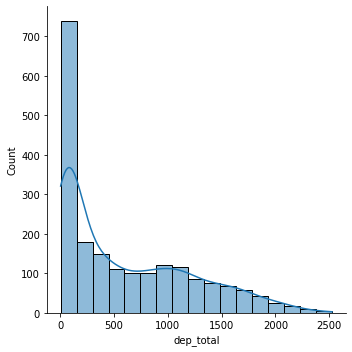

In [6]:
sns.displot(campaign_df.dep_total, kde=True)

In [7]:
Xmms = campaign_df.drop(['2n Cycle','Basic','Graduation','Master','PhD','Divorced','Married','Single','Together','Widow','Kidhome','Teenhome','Complain','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Dt_Customer','Response'], axis=1)

In [8]:
mms = MinMaxScaler()
campaign_df_mms = mms.fit_transform(Xmms)
campaign_df_mms = pd.DataFrame(campaign_df_mms, columns=Xmms.columns)

In [9]:
campaign_df = campaign_df.drop(["Age","dep_total",'Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth'], axis=1)
campaign_df = pd.concat([campaign_df,campaign_df_mms], axis=1)
#campaign_df = campaign_df.drop('key_0', axis=1)

## KMEANS 1ere itération avec le meilleur résultat

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [ ]:
del X

In [47]:
inertia = []
X = campaign_df_mms[["Income","Recency","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth","Age","dep_total"]
]
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

In [48]:
kl = KneeLocator(range(1, 20), inertia, curve="convex", direction="decreasing")
kl.elbow

4

In [49]:
model = KMeans(n_clusters=4)
model.fit(X)
model.predict(X)

array([3, 2, 1, ..., 3, 1, 2])

In [50]:
silhouette_score(X, model.labels_, metric='euclidean')

0.2406660447418178

In [51]:
model.labels_

array([3, 2, 1, ..., 3, 1, 2])

In [52]:
#X["cluster"] = model.labels_
campaign_df["cluster"] = model.labels_

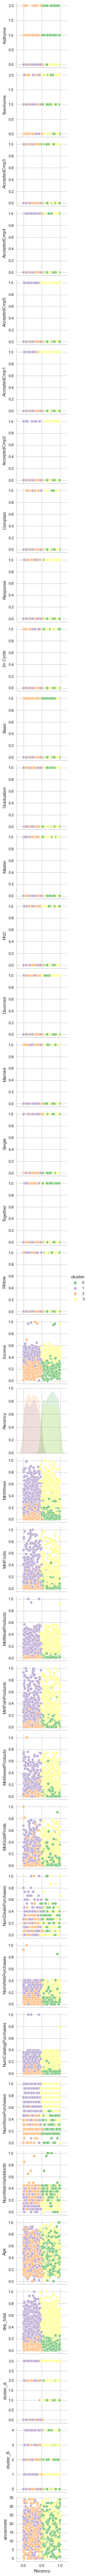

In [53]:
sns.pairplot(campaign_df, x_vars=['Recency'],hue='cluster', palette="Accent")

Cluster vert : Achète souvent et dépense beaucoup avec fort income  
Cluster orange : Achète rarement mais dépense beaucoup avec fort income  
Cluster jaune : Achète souvent en dépensant peu avec faible income  
Cluster violet : Achète rarement en dépensant peu avec faible income  

In [72]:
df["cluster"]= model.labels_

In [75]:
df.drop(["Unnamed: 0","index"],axis=1,inplace=True)

In [76]:
df_good = df[df["cluster"] == 1]

In [80]:
df_good["Age"] = 2014 - df_good["Year_Birth"]
df_good.drop("Year_Birth", axis=1, inplace=True)

C:\Users\Simplon\AppData\Local\Temp/ipykernel_2052/3221447510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good["Age"] = 2014 - df_good["Year_Birth"]
C:\Users\Simplon\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [83]:
df_good["dépense totale"] = df_good["MntWines"] + df_good["MntFruits"] + df_good["MntMeatProducts"] + df_good["MntFishProducts"] + df_good["MntSweetProducts"] + df_good["MntGoldProds"]

C:\Users\Simplon\AppData\Local\Temp/ipykernel_2052/1289213175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good["dépense totale"] = df_good["MntWines"] + df_good["MntFruits"] + df_good["MntMeatProducts"] + df_good["MntFishProducts"] + df_good["MntSweetProducts"] + df_good["MntGoldProds"]


### Résultat de l'analyse avec un describe

**Meilleur groupe de clients :**  
- Marié  
- moyenne d'âge de 46 ans  
- revenue moyen de 69k  
- Récence de 23j
- Ne sont pas atteint pas les campagnes
- Dépense en moyenne 1120€

In [84]:
pd.set_option('display.max_columns', None)
df_good.describe(include="all")

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,cluster,Age,dépense totale
count,453.000000,453,453,453.000000,453.000000,453.000000,453,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.0,453.000000,453.000000
unique,NaN,4,5,NaN,NaN,NaN,330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Graduation,Married,NaN,NaN,NaN,2013-11-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,235,171,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5720.690949,NaN,NaN,69407.549669,0.112583,0.512141,NaN,23.077263,563.715232,51.152318,321.189845,69.532009,49.006623,66.834437,2.437086,5.830022,4.774834,8.558499,4.088300,0.072848,0.130243,0.152318,0.141280,0.028698,0.006623,0.269316,1.0,46.699779,1121.430464
std,3302.310532,NaN,NaN,13976.266273,0.323348,0.546880,NaN,14.269242,303.866726,50.350376,255.569396,64.280958,48.273396,56.131415,2.290543,2.412134,3.111865,2.696975,2.238277,0.260174,0.336943,0.359726,0.348696,0.167140,0.081199,0.444095,0.0,11.719733,469.634246
min,1.000000,NaN,NaN,2447.000000,0.000000,0.000000,NaN,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,19.000000,326.000000
25%,2882.000000,NaN,NaN,60905.000000,0.000000,0.000000,NaN,11.000000,329.000000,13.000000,130.000000,19.000000,13.000000,26.000000,1.000000,4.000000,3.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,38.000000,746.000000
50%,5547.000000,NaN,NaN,69372.000000,0.000000,0.000000,NaN,23.000000,513.000000,32.000000,241.000000,50.000000,32.000000,46.000000,1.000000,6.000000,4.000000,8.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,47.000000,1072.000000
75%,8783.000000,NaN,NaN,78285.000000,0.000000,1.000000,NaN,35.000000,769.000000,76.000000,456.000000,106.000000,74.000000,95.000000,3.000000,7.000000,6.000000,11.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,56.000000,1443.000000


## Changement de Features

In [11]:
sse = []
A = campaign_df_mms[["Income","Recency","dep_total"]]
A[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Response']] = campaign_df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'
,'Response']]
                    
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(A)
    sse.append(kmeans.inertia_)

C:\Users\Simplon\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [12]:
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")
kl.elbow

7

In [24]:
modelA = KMeans(n_clusters=4)
modelA.fit(A)
modelA.predict(A)

array([2, 0, 0, ..., 1, 0, 2])

In [25]:
silhouette_score(A, modelA.labels_, metric='euclidean')

0.2858631405581902

In [26]:
campaign_df["cluster_A"] = modelA.labels_

In [27]:
campaign_df["cluster_A"].value_counts()

1    839
0    803
2    215
3    151
Name: cluster_A, dtype: int64

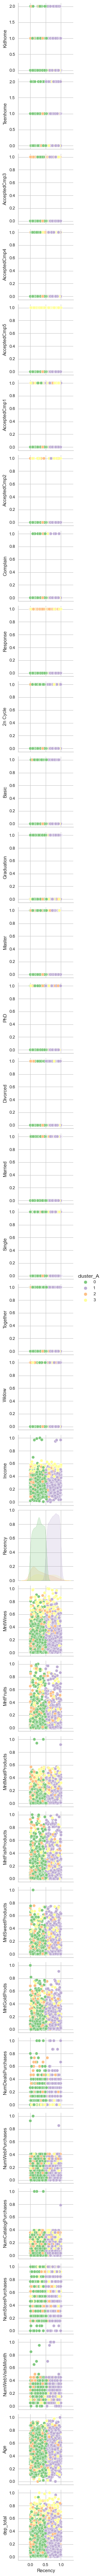

In [28]:
sns.pairplot(campaign_df, x_vars=['Recency'],hue='cluster_A', palette="Accent")

## Changement de features 2nd

In [29]:
B = campaign_df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']]

In [32]:
listB = []
                    
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(B)
    listB.append(kmeans.inertia_)

In [33]:
kl = KneeLocator(range(1, 20), listB, curve="convex", direction="decreasing")
kl.elbow

5

In [34]:
modelB = KMeans(n_clusters=5)
modelB.fit(B)
modelB.predict(B)

array([3, 0, 0, ..., 4, 0, 3])

In [37]:
silhouette_score(A, modelA.labels_, metric='euclidean')

0.2858631405581902

In [35]:
campaign_df["cluster_B"] = modelB.labels_

In [36]:
campaign_df["cluster_B"].value_counts()

0    1524
3     177
2     133
4      92
1      82
Name: cluster_B, dtype: int64

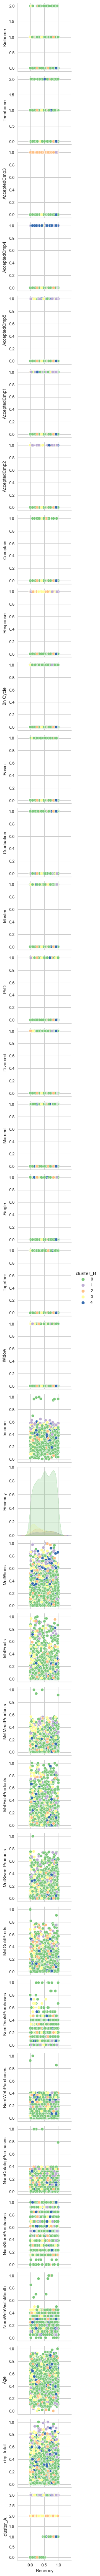

In [38]:
sns.pairplot(campaign_df, x_vars=['Recency'],hue='cluster_B', palette="Accent")

In [41]:
campaign_df

,Kidhome,Teenhome,Dt_Customer,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,dep_total,cluster_A,cluster_B,anciennete
0,0,0,2012-04-09,0,0,0,0,0,0,1,...,0.200000,0.296296,0.357143,0.307692,0.35,0.696429,0.639683,2,3,31.0
1,1,1,2014-08-03,0,0,0,0,0,0,0,...,0.133333,0.037037,0.035714,0.153846,0.25,0.750000,0.008730,0,0,4.0
2,0,0,2013-08-21,0,0,0,0,0,0,0,...,0.066667,0.296296,0.071429,0.769231,0.20,0.553571,0.305952,0,0,15.0
3,1,0,2014-10-02,0,0,0,0,0,0,0,...,0.133333,0.074074,0.000000,0.307692,0.30,0.214286,0.019048,0,0,2.0
4,1,0,2014-01-19,0,0,0,0,0,0,0,...,0.333333,0.185185,0.107143,0.461538,0.25,0.267857,0.165476,1,0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,0,0,2012-08-17,0,0,0,0,0,0,0,...,0.066667,0.000000,0.000000,0.230769,0.20,0.178571,0.006746,0,0,27.0
2004,0,1,2013-06-13,0,0,0,0,0,0,0,...,0.133333,0.333333,0.107143,0.307692,0.25,0.517857,0.530159,0,0,17.0
2005,0,0,2014-01-25,0,1,0,0,0,0,0,...,0.066667,0.074074,0.107143,1.000000,0.30,0.267857,0.490476,1,4,10.0
2006,0,1,2014-01-24,0,0,0,0,0,0,0,...,0.133333,0.222222,0.178571,0.769231,0.15,0.714286,0.332540,0,0,10.0


In [44]:
campaign_df[["Income", "anciennete","dep_total"]]

,Income,anciennete,dep_total
0,0.351086,31.0,0.639683
1,0.277680,4.0,0.008730
2,0.434956,15.0,0.305952
3,0.155079,2.0,0.019048
4,0.352051,10.0,0.165476
...,...,...,...
2003,0.156137,27.0,0.006746
2004,0.370288,17.0,0.530159
2005,0.343885,10.0,0.490476
2006,0.420217,10.0,0.332540
